Пункт 1:  

$1. b_1 + b_2 = 1$
$2. b_2 \cdot c_2 = \frac{1}{2}$  

c_2 = 0.15 =>  
$b_2 = \frac{10}{3}$  
$b_1 = 1 - b_2 = -\frac{7}{3}$  
$a_{21} = c_2$  

Тогда расчётная схема:  
$K_1 = f(x_0, y_0)$  
$K_2 = f(x_0 + c_2\cdot h, y_0 + a_{21}\cdot h \cdot K_1) = f(x_0 + 0.15\cdot h, y_0 + 0.15 h \cdot K_1)$  
Тогда:  
$y_1 = y_0 + h \cdot (\frac{-7}{3} \cdot K_1 + \frac{10}{3}\cdot K_2)$

In [23]:
import numpy as np

A = -2
B = -2
C = 2


def rk2_step(f, x_n, y_n, h):
    c2 = 0.15
    b1 = -7/3
    b2 = 10/3
    a21 = c2

    K1 = f(x_n, y_n)
    K2 = f(x_n + c2 * h, y_n + a21 * h * K1)
    
    y_next = y_n + h * (b1 * K1 + b2 * K2)
    return y_next


def f_example(x, y):
    return np.array([2*x*y[1]**(1/B)*y[3], 
                     2*B*x*np.exp(B/C*(y[2]-A))*y[3],
                     2*C*x*y[3],
                     -2*x*np.log(y[0])])


y0 = np.array([1, 1, A, 1])
x0 = 0
h = 0.1

# Посчитаем значение в y1
y1 = rk2_step(f_example, x0, y0, h)
for i in range(len(y1)):
    print(y1[i], end=", " )


1.01, 0.98, -1.98, 1.0, 

Теперь построим метод третьего порядка Рунге-Кутты (28)

In [24]:
import numpy as np

def rk3_step(f, x_n, y_n, h):
    K1 = f(x_n, y_n)
    K2 = f(x_n + h/3, y_n + h/3 * K1)
    K3 = f(x_n + 2*h/3, y_n + 2*h/3 * K2)  
    y_next = y_n + h * (1/4 * K1 + 3/4 * K3)
    return y_next

def f_example(x, y):
    return np.array([2*x*y[1]**(1/B)*y[3], 
                     2*B*x*np.exp(B/C*(y[2]-A))*y[3],
                     2*C*x*y[3],
                     -2*x*np.log(y[0])])

y0 = np.array([1, 1, A, 1])
x0 = 0
h = 0.1

y1 = rk3_step(f_example, x0, y0, h)
for i in range(len(y1)):
    print(y1[i], end=", " )


1.0100447429527364, 0.9801769899902343, -1.98, 0.9999556540293213, 

Перейдём к сравнению методов.

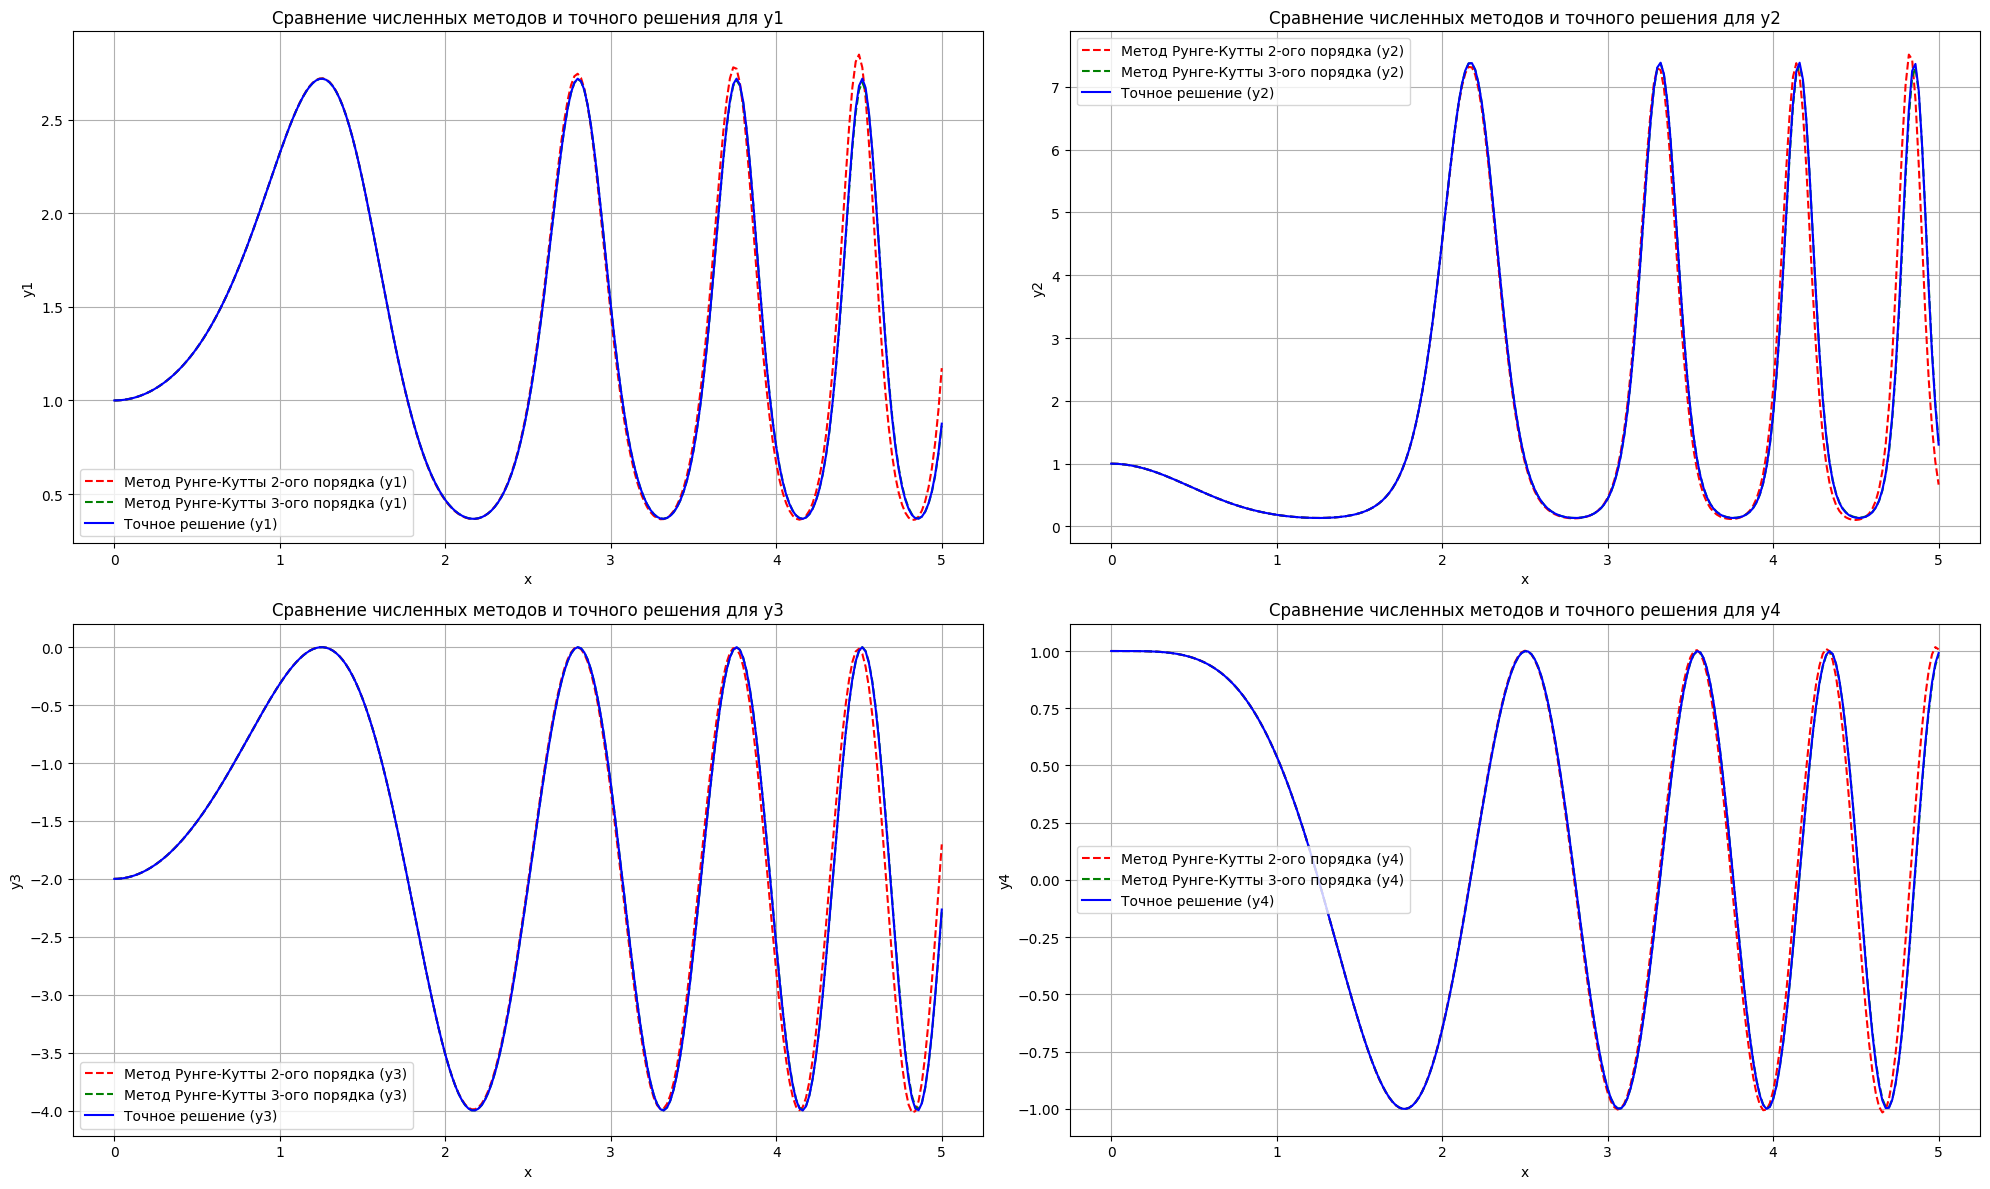

In [50]:
import numpy as np
import matplotlib.pyplot as plt


def exact_solution(x):
    y1 = np.exp(np.sin(x**2))
    y2 = np.exp(B * np.sin(x**2))
    y3 = C * np.sin(x**2) + A
    y4 = np.cos(x**2)
    return np.array([y1, y2, y3, y4])


def rk2_step(f, x_n, y_n, h):
    c2 = 0.15
    b1 = -7/3
    b2 = 10/3
    
    k1 = f(x_n, y_n)
    k2 = f(x_n + c2 * h, y_n + c2 * h * k1)
    
    y_next = y_n + h * (b1 * k1 + b2 * k2)
    return y_next

def rk3_step(f, x_n, y_n, h):
    K1 = f(x_n, y_n)
    K2 = f(x_n + h/3, y_n + h/3 * K1)
    K3 = f(x_n + 2*h/3, y_n + 2*h/3 * K2)
    
    y_next = y_n + h * (1/4 * K1 + 3/4 * K3)
    return y_next


def f_system(x, y):
    if y[1] == 0:
        dy1 = 2 * x * (1e-8**(1/B)) * y[3]
    else:
        dy1 = 2 * x * (y[1]**(1/B)) * y[3] 
    exponent_arg = np.clip((B / C) * (y[2] - A), -10, 10)
    dy2 = 2 * B * x * np.exp(   exponent_arg) * y[3]
    dy3 = 2 * C * x * y[3]
    if y[0] <= 0:
        dy4 = -2 * x * np.log(1e-8) 
    else:
        dy4 = -2 * x * np.log(y[0])
    
    return np.array([dy1, dy2, dy3, dy4])


y0 = np.array([1, 1, A, 1])
x0 = 0
x_end = 5
h = 0.02
n_steps = int((x_end - x0) / h)
x_values = np.linspace(x0, x_end, n_steps + 1)


y_rk2 = np.zeros((n_steps + 1, 4))
y_rk3 = np.zeros((n_steps + 1, 4))
y_exact = np.zeros((n_steps + 1, 4))


y_rk2[0] = y0
y_rk3[0] = y0
y_exact[0] = exact_solution(x0)


for i in range(n_steps):
    y_rk2[i+1] = rk2_step(f_system, x_values[i], y_rk2[i], h)
    y_rk3[i+1] = rk3_step(f_system, x_values[i], y_rk3[i], h)
    y_exact[i+1] = exact_solution(x_values[i+1])


plt.figure(figsize=(20, 12))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.plot(x_values, y_rk2[:, j], 'r--', label=f'Метод Рунге-Кутты 2-ого порядка (y{j+1})')
    plt.plot(x_values, y_rk3[:, j], 'g--', label=f'Метод Рунге-Кутты 3-ого порядка (y{j+1})')
    plt.plot(x_values, y_exact[:, j], 'b-', label=f'Точное решение (y{j+1})')
    plt.title(f"Сравнение численных методов и точного решения для y{j+1}")
    plt.xlabel("x")
    plt.ylabel(f"y{j+1}")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


Теперь займёмся сравнением.

C:\Users\Timofey\AppData\Local\Temp\ipykernel_5036\1715996661.py:37: RuntimeWarning: invalid value encountered in scalar power
  dy1 = 2 * x * (y[1]**(1/B)) * y[3]


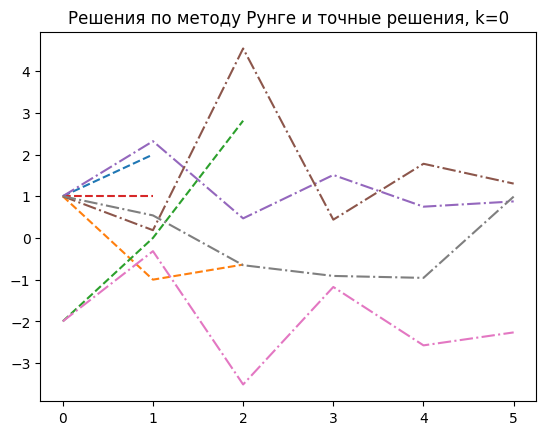

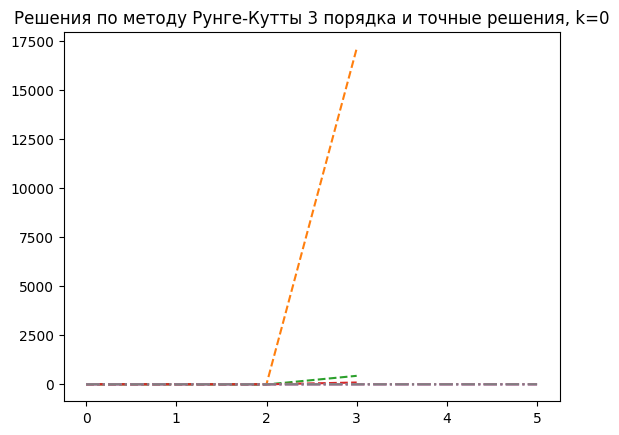

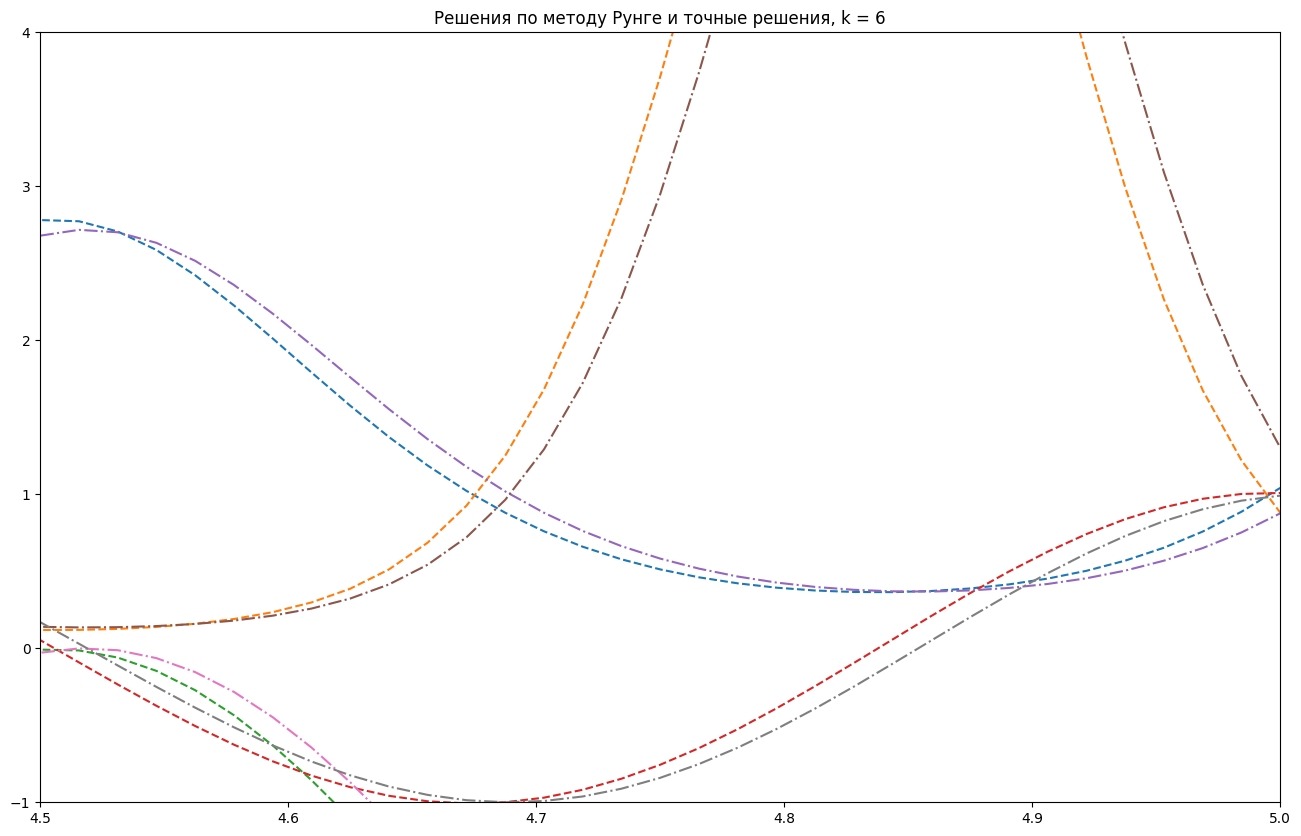

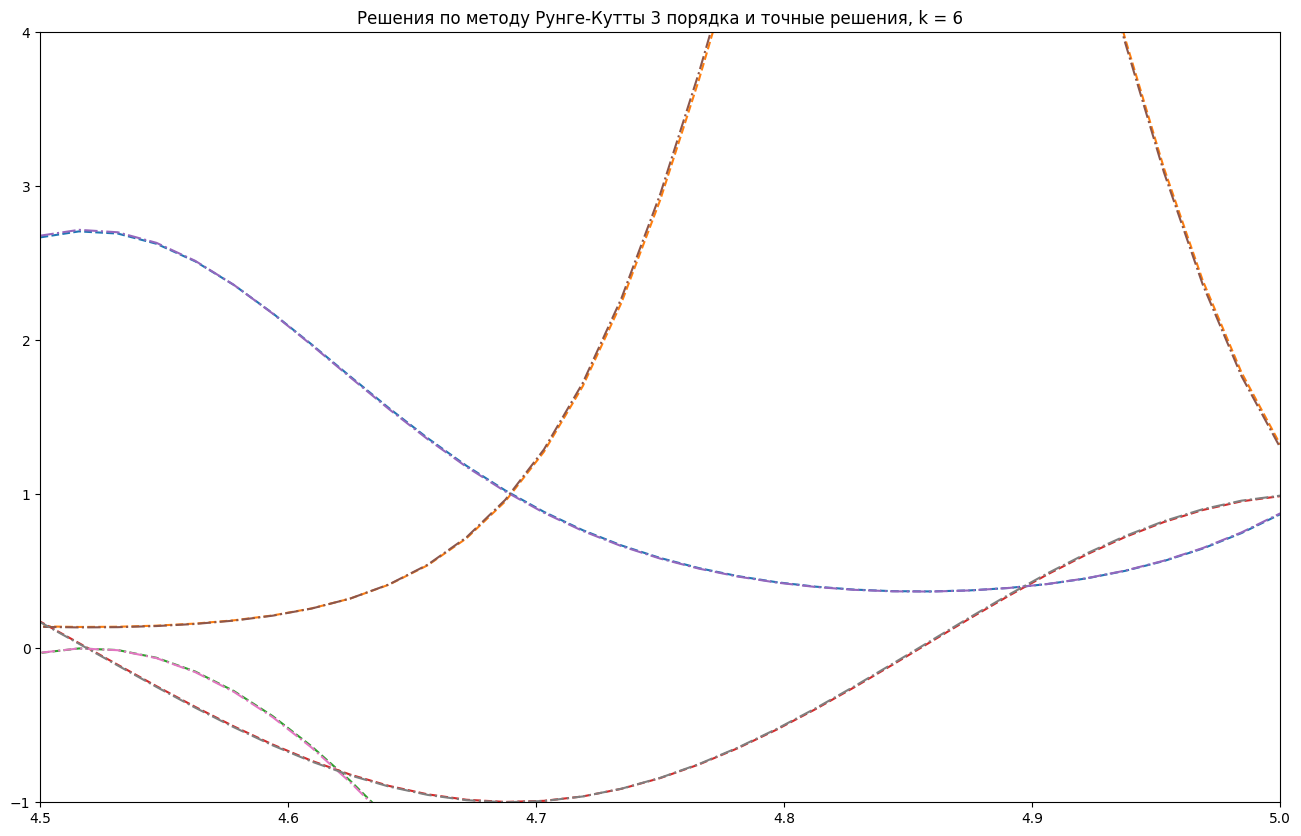

In [55]:
def runge_kutta_2(f, y0, x0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros((len(x_values), len(y0)))
    y_values[0] = y0
    
    c2 = 0.15
    b1 = -7/3
    b2 = 10/3

    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[i - 1]

        K1 = f(x, y)
        K2 = f(x + c2 * h, y + c2 * h * K1)

        y_values[i] = y + h * (b1 * K1 + b2 * K2)

    return x_values, y_values


def rk3_method(f, y0, x0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros((len(x_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[i - 1]

        K1 = f(x, y)
        K2 = f(x + h/3, y + h/3 * K1)
        K3 = f(x + 2*h/3, y + (2*h/3 * K2))

        y_values[i] = y + (h) * (1/4*K1 + 3/4*K3)

    return x_values, y_values


y0 = np.array([1, 1, A, 1])
x0, x_end = 0, 5
steps = [2**(-k) for k in range(7)]

errors_rk2 = []
errors_rk3 = []

for h in steps:

    x_rk, y_rk = runge_kutta_2(f_system, y0, x0, x_end, h)
    exact_y_rk = exact_solution(x_rk).T
    error_rk2 = np.linalg.norm(exact_y_rk - y_rk, axis=1)[-1]
    errors_rk2.append(error_rk2)

    x_rk3, y_rk3 = rk3_method(f_system, y0, x0, x_end, h)
    exact_y_rk3 = exact_solution(x_rk3).T
    error_rk3 = np.linalg.norm(exact_y_rk3 - y_rk3, axis=1)[-1]
    errors_rk3.append(error_rk3)

    if h == 1:
        plt.subplot()
        plt.plot(x_rk, y_rk,'--', x_rk, exact_y_rk,'-.')
        plt.title('Решения по методу Рунге и точные решения, k=0')
        plt.show()
        plt.plot(x_rk3, y_rk3,'--', x_rk3, exact_y_rk3,'-.')
        plt.title('Решения по методу Рунге-Кутты 3 порядка и точные решения, k=0')
        plt.show()

    if h == 0.015625:
        plt.figure(figsize=(16,10))
        plt.plot(x_rk, y_rk,'--', x_rk, exact_y_rk,'-.')
        plt.axis([4.5, 5, -1, 4])
        plt.title('Решения по методу Рунге и точные решения, k = 6')
        plt.show()
        
        plt.figure(figsize=(16,10))
        plt.axis([4.5, 5, -1, 4])
        plt.plot(x_rk3, y_rk3,'--', x_rk3, exact_y_rk3,'-.')
        plt.title('Решения по методу Рунге-Кутты 3 порядка и точные решения, k = 6')
        plt.show()


Поиск оптимального шага

C:\Users\Timofey\AppData\Local\Temp\ipykernel_5036\1715996661.py:37: RuntimeWarning: invalid value encountered in scalar power
  dy1 = 2 * x * (y[1]**(1/B)) * y[3]


Оптимальный шаг для метода РК2: 9.765625e-05
Оптимальный шаг для метода РК3: 0.0015625


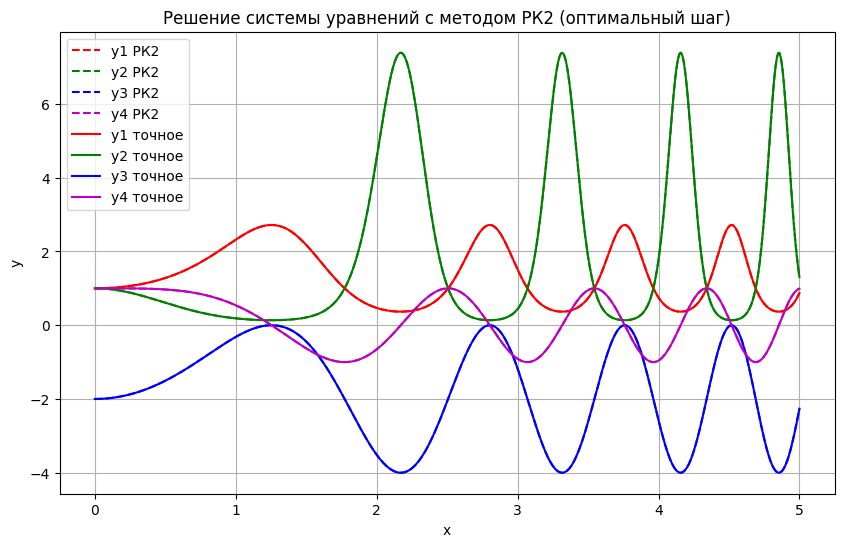

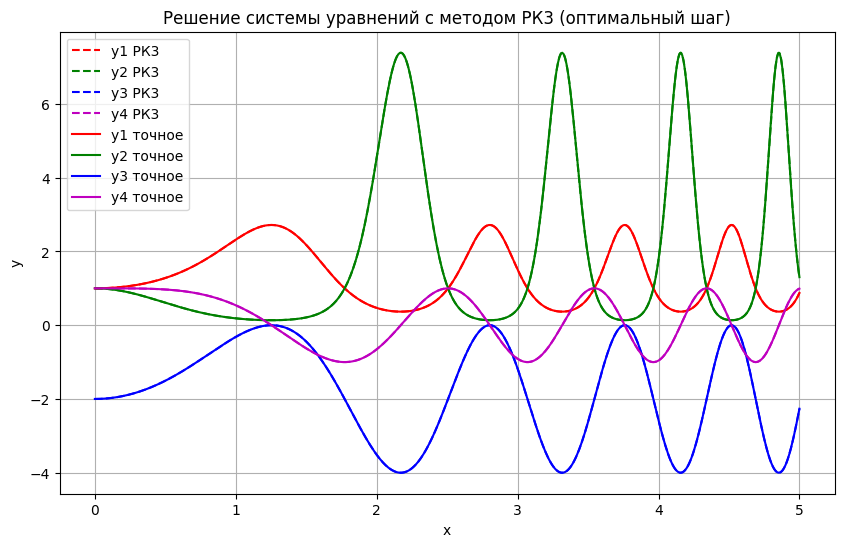

In [58]:
def runge_rule_error(y_h, y_half_h, p):
    return np.linalg.norm(y_half_h - y_h, ord=np.inf) / (2**p - 1)


def find_optimal_h(f_system, exact_solution, x0, x_end, y0, tol, method):
    h = 0.1
    p = 2 if method == 'rk2' else 3 
    
    while True:
        n_steps = int((x_end - x0) / h)
        x_values_h = np.linspace(x0, x_end, n_steps + 1)
        y_h = np.zeros((n_steps + 1, 4))
        y_h[0] = y0
        
        n_steps_half = int((x_end - x0) / (h/2))
        x_values_half_h = np.linspace(x0, x_end, n_steps_half + 1)
        y_half_h = np.zeros((n_steps_half + 1, 4))
        y_half_h[0] = y0
        
        for i in range(n_steps):
            if method == 'rk2':
                y_h[i+1] = rk2_step(f_system, x_values_h[i], y_h[i], h)
            elif method == 'rk3':
                y_h[i+1] = rk3_step(f_system, x_values_h[i], y_h[i], h)
        
        for i in range(n_steps_half):
            if method == 'rk2':
                y_half_h[i+1] = rk2_step(f_system, x_values_half_h[i], y_half_h[i], h/2)
            elif method == 'rk3':
                y_half_h[i+1] = rk3_step(f_system, x_values_half_h[i], y_half_h[i], h/2)
        
        error = runge_rule_error(y_h[-1], y_half_h[-1], p)
        
        if error < tol:
            return h
        else:
            h /= 2

tol = 1e-5
h_opt_rk2 = find_optimal_h(f_system, exact_solution, x0, x_end, y0, tol, 'rk2')
h_opt_rk3 = find_optimal_h(f_system, exact_solution, x0, x_end, y0, tol, 'rk3')

print(f"Оптимальный шаг для метода РК2: {h_opt_rk2}")
print(f"Оптимальный шаг для метода РК3: {h_opt_rk3}")


def solve_with_fixed_h(f_system, y0, x0, x_end, h, method):
    n_steps = int((x_end - x0) / h)
    x_values = np.linspace(x0, x_end, n_steps + 1)
    y_values = np.zeros((n_steps + 1, 4))
    y_values[0] = y0
    
    for i in range(n_steps):
        if method == 'rk2':
            y_values[i+1] = rk2_step(f_system, x_values[i], y_values[i], h)
        elif method == 'rk3':
            y_values[i+1] = rk3_step(f_system, x_values[i], y_values[i], h)
    
    return x_values, y_values

h_opt_rk2 = find_optimal_h(f_system, exact_solution, x0, x_end, y0, tol, 'rk2')
h_opt_rk3 = find_optimal_h(f_system, exact_solution, x0, x_end, y0, tol, 'rk3')

x_rk2, y_rk2 = solve_with_fixed_h(f_system, y0, x0, x_end, h_opt_rk2, 'rk2')
x_rk3, y_rk3 = solve_with_fixed_h(f_system, y0, x0, x_end, h_opt_rk3, 'rk3')

x_exact = np.linspace(x0, x_end, 500)
y_exact = np.array([exact_solution(x) for x in x_exact])

plt.figure(figsize=(10, 6))
plt.plot(x_rk2, y_rk2[:, 0], 'r--', label='y1 РК2')
plt.plot(x_rk2, y_rk2[:, 1], 'g--', label='y2 РК2')
plt.plot(x_rk2, y_rk2[:, 2], 'b--', label='y3 РК2')
plt.plot(x_rk2, y_rk2[:, 3], 'm--', label='y4 РК2')
plt.plot(x_exact, y_exact[:, 0], 'r-', label='y1 точное')
plt.plot(x_exact, y_exact[:, 1], 'g-', label='y2 точное')
plt.plot(x_exact, y_exact[:, 2], 'b-', label='y3 точное')
plt.plot(x_exact, y_exact[:, 3], 'm-', label='y4 точное')
plt.title("Решение системы уравнений с методом РК2 (оптимальный шаг)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_rk3, y_rk3[:, 0], 'r--', label='y1 РК3')
plt.plot(x_rk3, y_rk3[:, 1], 'g--', label='y2 РК3')
plt.plot(x_rk3, y_rk3[:, 2], 'b--', label='y3 РК3')
plt.plot(x_rk3, y_rk3[:, 3], 'm--', label='y4 РК3')

plt.plot(x_exact, y_exact[:, 0], 'r-', label='y1 точное')
plt.plot(x_exact, y_exact[:, 1], 'g-', label='y2 точное')
plt.plot(x_exact, y_exact[:, 2], 'b-', label='y3 точное')
plt.plot(x_exact, y_exact[:, 3], 'm-', label='y4 точное')

plt.title("Решение системы уравнений с методом РК3 (оптимальный шаг)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


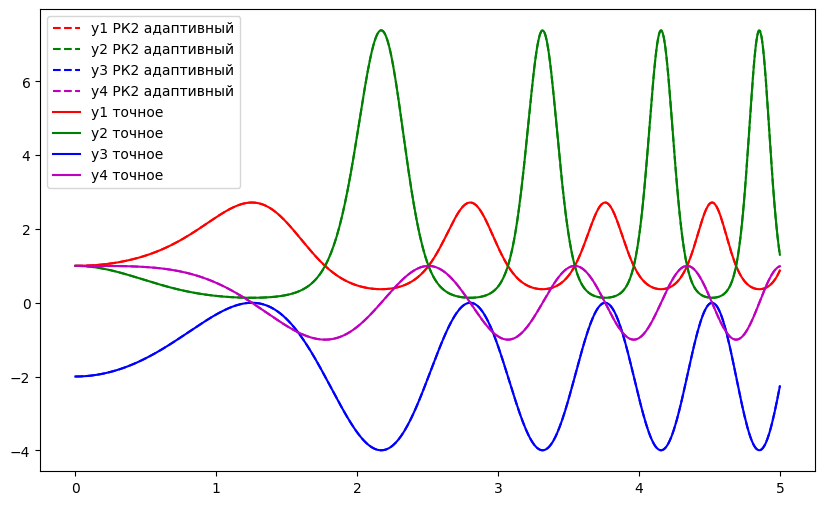

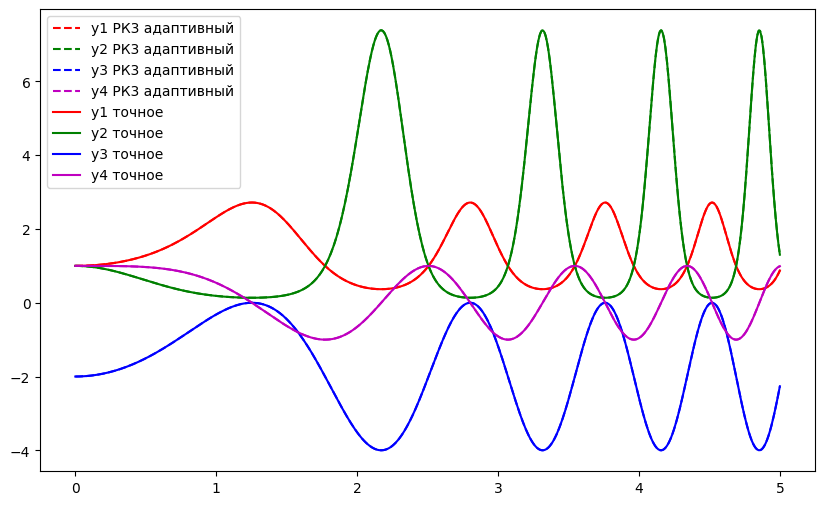

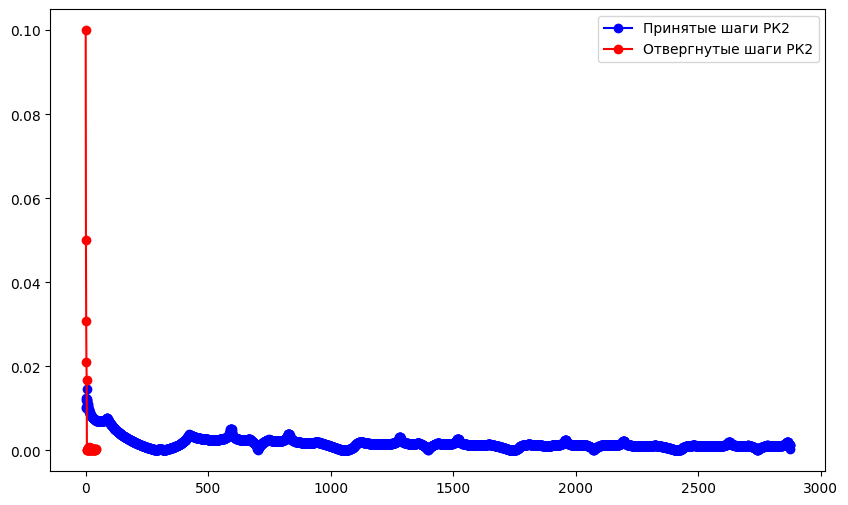

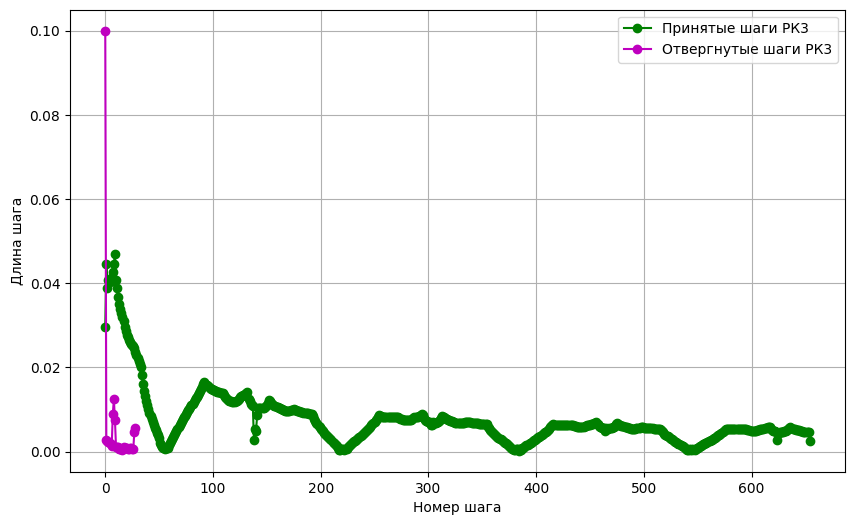

In [64]:
def adaptive_rk(f_system, y0, x0, x_end, h_init, rtol, atol, method):
    h = h_init 
    x_values = [x0]
    y_values = [y0]
    rejected_steps = [] 
    accepted_steps = []  

    x = x0
    y = y0
    
    while x < x_end:
        if method == 'rk2':
            y_h = rk2_step(f_system, x, y, h)
            y_half_h = rk2_step(f_system, x, y, h / 2)
            y_half_h = rk2_step(f_system, x + h / 2, y_half_h, h / 2)
            p = 2
        elif method == 'rk3':
            y_h = rk3_step(f_system, x, y, h)
            y_half_h = rk3_step(f_system, x, y, h / 2)
            y_half_h = rk3_step(f_system, x + h / 2, y_half_h, h / 2)
            p = 3
        
        scale = atol + rtol * np.maximum(np.abs(y_h), np.abs(y_half_h))
        error = np.linalg.norm((y_half_h - y_h) / scale, ord=np.inf)

        if error < 1.0:
            x += h
            y = y_h
            x_values.append(x)
            y_values.append(y)
            accepted_steps.append(h)
        else:
            rejected_steps.append(h)
        
        h *= min(5, max(0.1, 0.8 * (1.0 / error)**(1 / p)))
        if x + h > x_end:
            h = x_end - x
    
    return np.array(x_values), np.array(y_values), accepted_steps, rejected_steps

rtol = 1e-6
atol = 1e-12
h_init = 0.1

x_adaptive_rk2, y_adaptive_rk2, accepted_steps_rk2, rejected_steps_rk2 = adaptive_rk(f_system, y0, x0, x_end, h_init, rtol, atol, 'rk2')
x_adaptive_rk3, y_adaptive_rk3, accepted_steps_rk3, rejected_steps_rk3 = adaptive_rk(f_system, y0, x0, x_end, h_init, rtol, atol, 'rk3')

plt.figure(figsize=(10, 6))
plt.plot(x_adaptive_rk2, y_adaptive_rk2[:, 0], 'r--', label='y1 РК2 адаптивный')
plt.plot(x_adaptive_rk2, y_adaptive_rk2[:, 1], 'g--', label='y2 РК2 адаптивный')
plt.plot(x_adaptive_rk2, y_adaptive_rk2[:, 2], 'b--', label='y3 РК2 адаптивный')
plt.plot(x_adaptive_rk2, y_adaptive_rk2[:, 3], 'm--', label='y4 РК2 адаптивный')
plt.plot(x_exact, y_exact[:, 0], 'r-', label='y1 точное')
plt.plot(x_exact, y_exact[:, 1], 'g-', label='y2 точное')
plt.plot(x_exact, y_exact[:, 2], 'b-', label='y3 точное')
plt.plot(x_exact, y_exact[:, 3], 'm-', label='y4 точное')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(x_adaptive_rk3, y_adaptive_rk3[:, 0], 'r--', label='y1 РК3 адаптивный')
plt.plot(x_adaptive_rk3, y_adaptive_rk3[:, 1], 'g--', label='y2 РК3 адаптивный')
plt.plot(x_adaptive_rk3, y_adaptive_rk3[:, 2], 'b--', label='y3 РК3 адаптивный')
plt.plot(x_adaptive_rk3, y_adaptive_rk3[:, 3], 'm--', label='y4 РК3 адаптивный')
plt.plot(x_exact, y_exact[:, 0], 'r-', label='y1 точное')
plt.plot(x_exact, y_exact[:, 1], 'g-', label='y2 точное')
plt.plot(x_exact, y_exact[:, 2], 'b-', label='y3 точное')
plt.plot(x_exact, y_exact[:, 3], 'm-', label='y4 точное')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(range(len(accepted_steps_rk2)), accepted_steps_rk2, 'b-o', label='Принятые шаги РК2')
plt.plot(range(len(rejected_steps_rk2)), rejected_steps_rk2, 'r-o', label='Отвергнутые шаги РК2')
plt.legend()
plt.figure(figsize=(10, 6))
plt.plot(range(len(accepted_steps_rk3)), accepted_steps_rk3, 'g-o', label='Принятые шаги РК3')
plt.plot(range(len(rejected_steps_rk3)), rejected_steps_rk3, 'm-o', label='Отвергнутые шаги РК3')
plt.legend()

plt.xlabel("Номер шага")
plt.ylabel("Длина шага")
plt.legend()
plt.grid(True)
plt.show()
